In [25]:
import pandas as pd
from pprint import pprint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mapbox import Geocoder
#from tqdm.notebook import tqdm
import os
from dotenv import load_dotenv
import json

In [26]:
address_df = pd.read_csv(r"data\raw\address.csv")

## Using Mapbox geocoding api

Trying for one address only

In [27]:
load_dotenv()
API_KEY = os.getenv('API_KEY')
geocoder = Geocoder(access_token= API_KEY)

# responses=[]
address_geocodes  = []
address = address_df["address"][0]
print(f"Address in my data: {address}\n----------")

response = geocoder.forward(address).json()
print(f"Response received: \n")
pprint(response)
print(f"\n--------")

address_geocode = {'address': address,
'place_name': response["features"][0]["place_name"],
    'relevance': response["features"][0]["relevance"],
    'bbox': response["features"][0]["bbox"],
    'longitude': response["features"][0]["center"][0],
    'lattitude': response["features"][0]["center"][1]

    }
address_geocodes.append(address_geocode)

print(f"keeoing the essential values, we get,")
pprint(address_geocode)
pprint(address_geocodes)

df = pd.DataFrame(address_geocodes)

print(df)


Address in my data: Electronic City Phase II,Bangalore,Karnataka,India
----------
Response received: 

{'attribution': 'NOTICE: © 2023 Mapbox and its suppliers. All rights reserved. '
                'Use of this data is subject to the Mapbox Terms of Service '
                '(https://www.mapbox.com/about/maps/). This response and the '
                'information it contains may not be retained. POI(s) provided '
                'by Foursquare.',
 'features': [{'bbox': [77.6712864, 12.83594, 77.692464, 12.8537642],
               'center': [77.680811, 12.843526],
               'context': [{'id': 'postcode.83873387',
                            'mapbox_id': 'dXJuOm1ieHBsYzpCUC9PYXc',
                            'text': '560100'},
                           {'id': 'locality.1297181291',
                            'mapbox_id': 'dXJuOm1ieHBsYzpUVkZxYXc',
                            'text': 'Electronic City'},
                           {'id': 'place.5212267',
                        

Geoencoding all the addresses

In [28]:
load_dotenv()
API_KEY = os.getenv('API_KEY')
geocoder = Geocoder(access_token= API_KEY)

# responses=[]
address_geocodes  = []

for address in address_df.address:
    response = geocoder.forward(address).json()

    address_geocode = {'address': address,
    'place_name': response["features"][0]["place_name"],
        'relevance': response["features"][0]["relevance"],
        # 'bbox': response["features"][0]["bbox"],
        'longitude': response["features"][0]["center"][0],
        'lattitude': response["features"][0]["center"][1]

        }
    address_geocodes.append(address_geocode)

df = pd.DataFrame(address_geocodes)


In [29]:
df

,address,place_name,relevance,longitude,lattitude
0,"Electronic City Phase II,Bangalore,Karnataka,I...","Electronic City Phase II, Electronic City, Ben...",1.000000,77.680811,12.843526
1,"Chikka Tirupathi,Bangalore,Karnataka,India","Chikka Tirupathi Temple, NH 207, Malur, Karnat...",0.818222,77.865734,12.895305
2,"Uttarahalli,Bangalore,Karnataka,India","Bengaluru, Karnataka, India",0.750000,77.591300,12.979120
3,"Lingadheeranahalli,Bangalore,Karnataka,India","Lingadheeranahalli, Bengaluru, Bengaluru Urban...",1.000000,77.541279,12.880725
4,"Kothanur,Bangalore,Karnataka,India","Kothanur, Bengaluru, Bengaluru Urban, Karnatak...",1.000000,77.649389,13.061360
...,...,...,...,...,...
1300,"Pattegarhpalya,Bangalore,Karnataka,India","Pattegarhpalya, Vijayanagar, Bengaluru, Bengal...",1.000000,77.522444,12.977787
1301,"Tilak Nagar,Bangalore,Karnataka,India","Tilak Nagar, Tilak Nagar, Bengaluru, Karnataka...",1.000000,77.588115,12.922427
1302,12th cross srinivas nagar banshankari 3rd stag...,"3rd Stage, Basaveshwar Nagar, Bengaluru, Benga...",0.676667,77.542156,12.989875
1303,"Havanur extension,Bangalore,Karnataka,India","Bengaluru, Karnataka, India",0.683333,77.591300,12.979120


In [30]:
file_path = r'data\processed/'
file_name = "addresses_gecoded_by_mapboxAPI.csv"
extract_info = file_path + file_name
df.to_csv(extract_info, index=False)

<Axes: xlabel='lattitude', ylabel='longitude'>

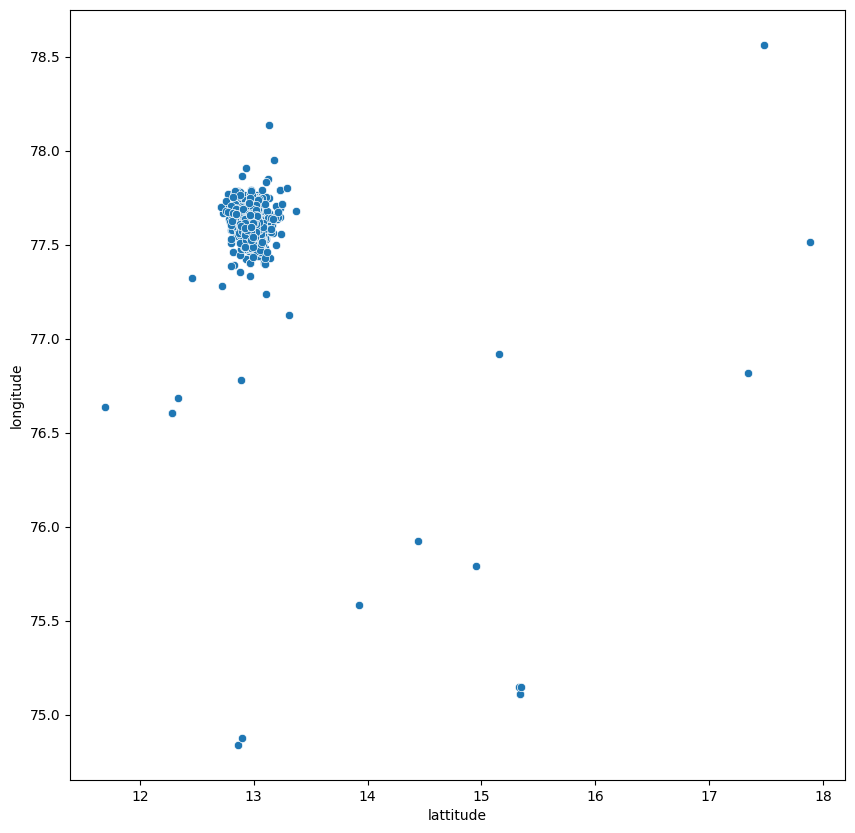

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= df.lattitude, y=df.longitude)